In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [32]:
df=pd.read_csv('placement-dataset.csv')

In [33]:

df

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
...,...,...,...
395,4.3,200,0
396,4.4,42,0
397,6.7,182,1
398,6.3,103,1


In [34]:


df.describe()


,cgpa,iq,placement
count,400.000000,400.000000,400.000000
mean,5.991000,123.580000,0.500000
std,1.139326,39.793749,0.500626
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


In [35]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

C:\Users\jaydi\AppData\Local\Temp\ipykernel_10484\541723000.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement'])


<Axes: xlabel='placement', ylabel='Density'>

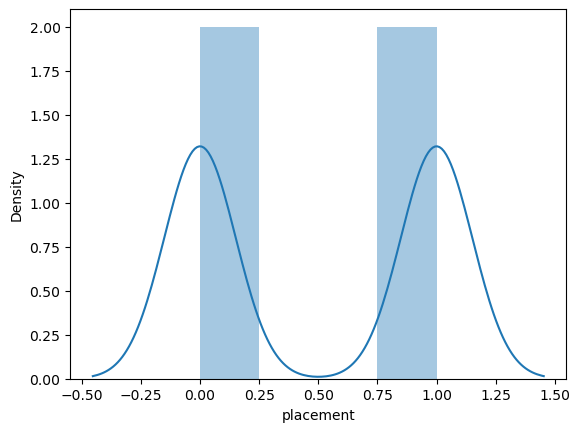

In [40]:

sns.distplot(df['placement'])

<Axes: >

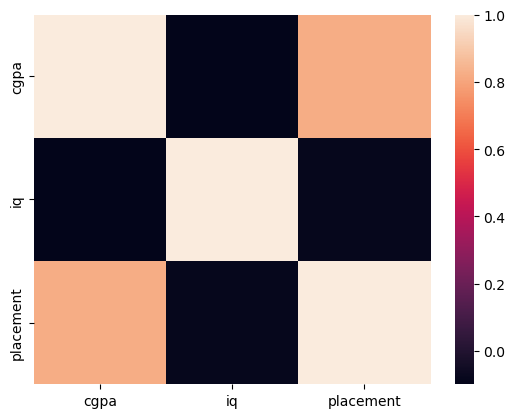

In [41]:
sns.heatmap(df.corr())

In [42]:
from mlxtend.plotting import plot_decision_regions

<Axes: xlabel='cgpa', ylabel='iq'>

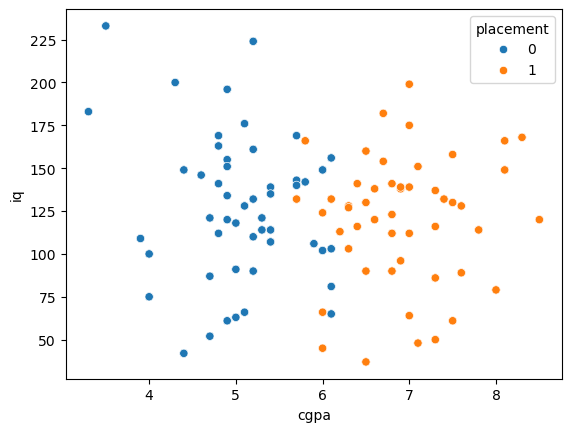

In [43]:
sns.scatterplot(x='cgpa',y='iq',data=df,hue='placement')

In [44]:
x=df.iloc[:,:-1]
y=df['placement']

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 

In [47]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [48]:
x_train,x_test

(array([[ 1.22978446,  0.16324922],
        [-1.73894306, -0.65700202],
        [-0.60384136, -0.11871214],
        [-2.17552064,  2.75216718],
        [ 0.61857586,  0.72717195],
        [ 0.26931379,  0.06071782],
        [ 0.53126034,  0.31704633],
        [-0.07994827, -0.50320491],
        [ 0.09468276,  0.77843765],
        [ 1.14246895, -1.01586193],
        [ 0.00736725,  0.59900769],
        [ 0.70589137, -0.91333053],
        [-1.73894306, -0.65700202],
        [ 0.53126034, -0.14434499],
        [-0.95310342,  1.80375169],
        [ 0.09468276, -0.58010346],
        [-0.95310342, -1.65668321],
        [-0.95310342,  1.80375169],
        [-1.21504997,  0.52210914],
        [-1.04041894,  1.11166471],
        [-0.69115688,  0.9066019 ],
        [ 0.00736725, -2.06680883],
        [-0.69115688,  2.52147152],
        [ 0.79320689, -0.75953342],
        [ 2.0156241 ,  1.08603186],
        [-0.86578791, -1.60541751],
        [-0.69115688,  0.16324922],
        [ 1.84099307,  0.599

In [49]:
from sklearn.naive_bayes import GaussianNB


In [50]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [51]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [52]:
gnb.score(x_test,y_test)

0.9125

In [53]:
accuracy_score(y_test, y_pred)

0.9125

In [54]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        41
           1       0.86      0.97      0.92        39

    accuracy                           0.91        80
   macro avg       0.92      0.91      0.91        80
weighted avg       0.92      0.91      0.91        80



<Axes: >

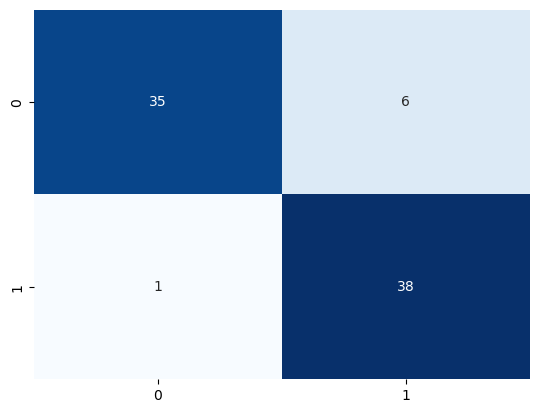

In [55]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

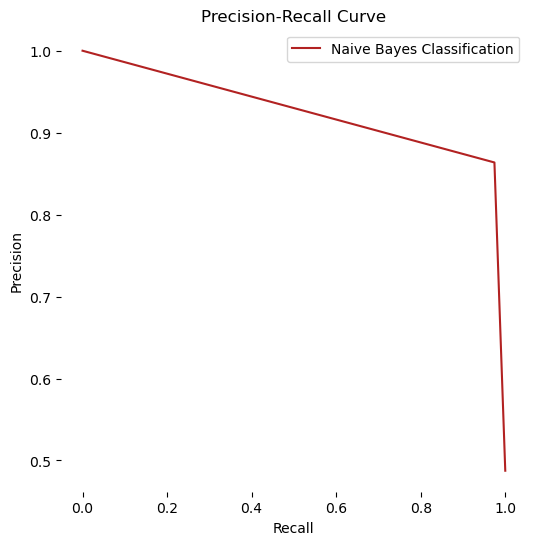

In [59]:
red_proba = gnb.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

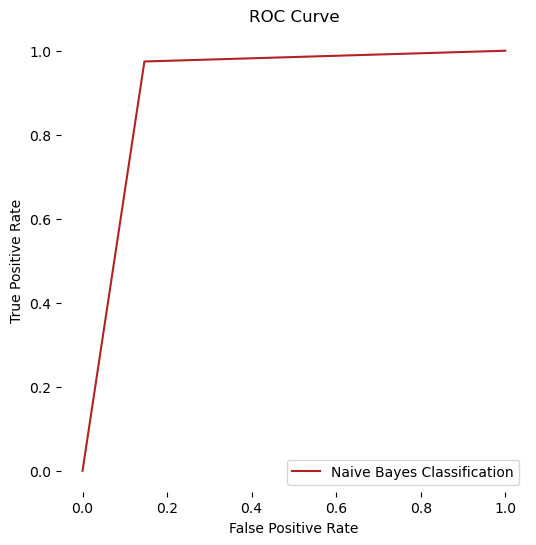

In [61]:
y_pred_proba = gnb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();